<h1 align="center">Python performance exercises</h1>

## Python best practices exercises

### Exercise 1

considering the following function for concatenating list strings with delimiter.

In [1]:
%load_ext line_profiler

In [2]:
import random
import string
def ft_concatenate(l_strings, d):
    """concatenate list of strings into one string separated by delimiter"""
    res = l_strings[0]
    for e in l_strings[1:]:
        res = res + d + e
    return res

L=[]
for i in range(100):
    L.append(random.choice(string.ascii_letters))

strings, d = L, ' def '
%lprun -f ft_concatenate ft_concatenate(strings, d)

The following screenshot illustrates which phase takes time for execution and it's the one doing the sum : res = res + d + e :

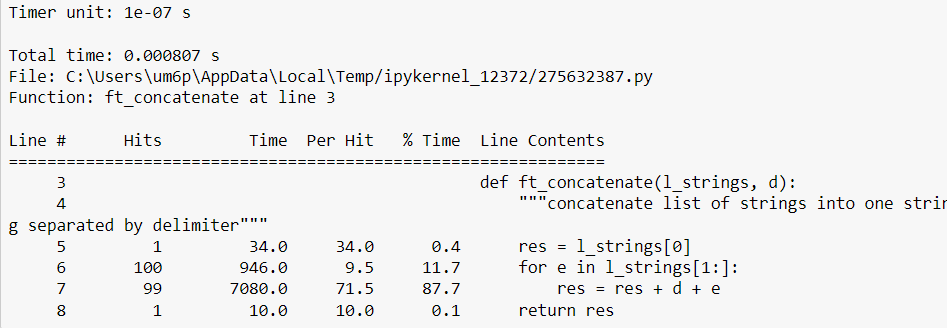

- profile the function and identify the bottlenecks.
- improve speed up of the function
*Hint: you may need to look to the string functions in python documentation*

In [3]:
def ft_concatenate(l_strings, d):
    res = d.join(l_strings)
    return res


l_strings, d = L, ' def'
%lprun -f ft_concatenate ft_concatenate(l_strings, d)

### Exercise 2

In this exercise you will solve the following problem using two methods bruteforce method, and fast method.

**Problem:** You are given a list of n integers, and your task is to calculate the number of distinct values in the list.

**Example**
- Input:
5
2 3 2 2 3

- Output:
2

**Implement the following methods:**

1. **bruteforce method:** create an empty list and start adding items for the given list without adding the previous item add, at the end the result list will contain unique values, print lenght of the list and you are done. 
2. **fast method** think of using Set data structure.

- time the two methods, what do you think?

In [4]:
# bruteforce method
def bruteforce(L):
    L_filtered=[]
    for i in L:
        if i not in L_filtered:
            L_filtered.append(i)
    return len(L_filtered)
L=[1,2, 2, 2, 3, 3, 4]
bruteforce(L)

4

In [5]:
# fast method
def fast_method(L):
    return len(set(L))

L=[1,2, 2, 2, 3, 3, 4]
fast_method(L)

4

In [6]:
# Create a random list of numbers for testing
import random
L = [random.randint(0, 1000) for i in range(10000)]

# time the two methods
%timeit bruteforce(L)
%timeit fast_method(L)

58.3 ms ± 1.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
203 µs ± 14.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Cython exercises

### Exercise 1

1. load the cython extension.

In [7]:
%load_ext cython

2. Considering the following polynomial function:

In [8]:
def poly(a,b):
    return 10.5 * a + 3 * (b**2)

- Create an equivalent Cython function of `poly` with name `poly_cy`.

In [9]:
%%cython -a
cpdef poly_cy(int a,int b):
    return 10.5 * a + 3 * (b*b)

3. time the performance of Python and Cython version of the function, what is the factor of speed up between the two verions.

In [10]:
%timeit poly(10,20)
%timeit poly_cy(10,20)

363 ns ± 25.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
65.7 ns ± 4.28 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


4. Now let's work on another example using loop.
    - rewrite the same function below fib that calculates the fibonacci sequence using cython, but now try to add type for the variables used inside it, add a prefix `_cy` to your new cython function.

In [11]:
def fib(n):
    a, b = 1, 1
    for i in range(n):
        a, b = a + b, a

    return a

In [12]:
%%cython -a
cpdef fib_cy(int n):
    cdef int a, b
    a,b = 2,4
    cdef int i=0
    for i in range(n):
        a, b = a + b, a

    return a

- time the two function for fibonacci series, with n = 20, what is the factor of speed now, What do you think?

In [13]:
%timeit fib(100)
%timeit fib_cy(100)

5.71 µs ± 337 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
107 ns ± 7.08 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


5. Recursive functions are functions that call themselves during their execution. Another interesting property of the Fibonacci sequence is that it can be written as a recursive function. That’s because each item depends on the values of other items (namely item n-1 and item n-2)

- Rewrite the fib function using recursion. Is it faster than the non-recursive version? Does Cythonizing it give even more of an advantage? 

In [14]:
def fib_recursive(n):
    if n==0:
        return 1
    if n==1:
        return 2
    else:
        return fib_recursive(n-1) + fib_recursive(n-2)

In [15]:
%timeit fib(20)
%timeit fib_cy(20)
%timeit fib_recursive(20)

1.34 µs ± 41.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
66.8 ns ± 2.89 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
2.7 ms ± 234 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Exercise 2

- Monte Carlo methods are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. 
- One of the basic examples of getting started with the Monte Carlo algorithm is the estimation of Pi.

**Estimation of Pi**

- The idea is to simulate random (x, y) points in a 2-D plane with domain as a square of side 1 unit. 
- Imagine a circle inside the same domain with same diameter and inscribed into the square. 
- We then calculate the ratio of number points that lied inside the circle and total number of generated points. 
- Refer to the image below:

![demo](../data/MonteCarloPlot.png)

We know that area of the square is 1 unit sq while that of circle is $\pi \ast  (\frac{1}{2})^{2} = \frac{\pi}{4}$. Now for a very large number of generated points,

![demo](../data/MonteCarloCalc.png)


## The Algorithm

1. Initialize cile_points, square_points and interval to 0.
2. Generate random point x.
3. Generate random point y.
4. Calculate d = x*x + y*y.
5. If d <= 1, increment circle_points.
6. Increment square_points.
7. Increment interval.
8. If increment < NO_OF_ITERATIONS, repeat from 2.
9. Calculate pi = 4*(circle_points/square_points).
10. Terminate.

**Your mission:** time the function `monte_carlo_pi`, identify the bottlenecks and create a new version using cython functionality to speed up monte carlo simulation for PI, use 100,000 points and compare the speed up factor between python and cython, considering the following optimizations:
- add type for variables used.
- add type for the function
- use c rand function instead of python rand function.
 
*Hint: you can import function from C libraries using the following approach `from libc.<name of c library> cimport <library function name>`, replace the holders `<>` with the right identities for the current problem*

In [16]:
import random
def monte_carlo_pi(nsamples):
    pi = 0.
   # Implement your code here
    cile_points = 0
    square_points = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        d = x*x + y*y
        if d<=1:
            cile_points += 1
        square_points += 1
    pi=4*(cile_points/square_points)
    return pi

In [17]:
%%cython
from libc.stdlib cimport rand


cdef extern from "limits.h":
        int INT_MAX
cpdef monte_carlo_pi_cy(int nsamples):
    
    cdef int i
    cdef int cile_points = 0
    cdef int square_points = 0
    cdef float pi = 0.5
    cdef float x, y, d

    for i in range(nsamples):
        x = rand() / float(INT_MAX)
        y = rand() / float(INT_MAX)
        d = x*x + y*y
        if d<=1:
            cile_points += 1
        square_points += 1
    return 4*(cile_points/square_points)

In [18]:
%timeit monte_carlo_pi(10000)
%timeit monte_carlo_pi_cy(100)

2.92 ms ± 162 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.43 µs ± 31.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Numba exercises

### Exercise 1

Previously we considered how to approximateby Monte Carlo.

- Use the same idea here, but make the code efficient using Numba.
- Compare speed with and without Numba when the sample size is large.

In [19]:
import numba
from numba import jit
import random

@jit(nopython=True)
def monte_carlo_pi_numba(nsamples):
    pi = 0.
    cile_points = 0
    square_points = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        d = x**2 + y**2
        if d<=1:
            cile_points += 1
        square_points += 1
    pi=4*(cile_points/square_points)
    return pi

In [20]:
%timeit monte_carlo_pi_numba(1000)

13.6 µs ± 1.52 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Exercise 2

In the [Introduction to Quantitative Economics](https://python.quantecon.org/intro.html) with Python lecture series you can learn all about finite-state Markov chains.

For now, let's just concentrate on simulating a very simple example of such a chain.

Suppose that the volatility of returns on an asset can be in one of two regimes — high or low.

The transition probabilities across states are as follows ![markov](../data/markov.png)

For example, let the period length be one day, and suppose the current state is high.

We see from the graph that the state tomorrow will be

- high with probability 0.8

- low with probability 0.2

Your task is to simulate a sequence of daily volatility states according to this rule.

Set the length of the sequence to `n = 1_000_000` and start in the high state.

Implement a pure Python version and a Numba version, and compare speeds.

To test your code, evaluate the fraction of time that the chain spends in the low state.

If your code is correct, it should be about 2/3.

Hints:

- Represent the low state as 0 and the high state as 1.

- If you want to store integers in a NumPy array and then apply JIT compilation, use `x = np.empty(n, dtype=np.int_)`.


In [24]:
import numpy as np
def transition(state):
    if state==1:
        return np.random.choice([0,1],p=[0.2,0.8])
    else:
        return np.random.choice([0,1],p=[0.9,0.1])
    
def serie(n):
    state=1
    time_spent=0
    for i in range(n):
        state=transition(state)
        if state==0:
            time_spent+=1
    return time_spent/n

print(serie(10000))

0.6652
